## Building Random Quantum Circuits, with and without Noise, to Analyse Measurement Outcome Fidelity

**Authors:** Pranavi Jain, Dr Marcin Abram

**Affiliation:** University of Southern California

**Configure Qiskit Runtime Service**

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="%your-API-token%", 
                                  set_as_default=True, overwrite=True)
 
# Load saved credentials
service = QiskitRuntimeService()

**Generate a Random Circuit for Given Parameters**
<br>
- Args:
    * noq - number of qubits
    * depth - depth of qauntum circuit
    * gate_set - dict of specified set of gates

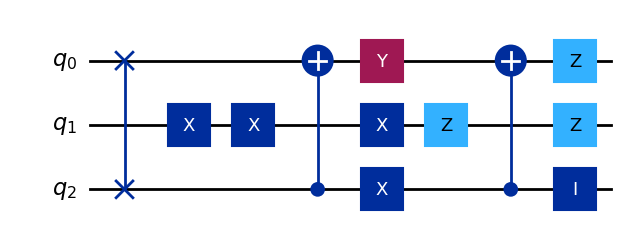

In [13]:
from random_circuit import eagle_gate_set, basis_gate_set
from random_circuit import get_random_circuit

## Main Function -- 1) Calling Random Circuit Generator
noq = 3
depth = 5
gate_set = basis_gate_set

circuit = get_random_circuit(noq, depth, gate_set)
circuit.draw('mpl')

**Add arbitrary Noise to Circuit generated above**

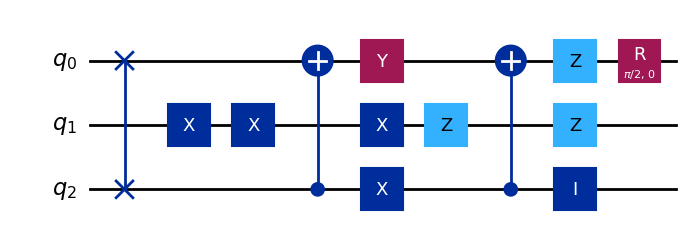

In [17]:
import numpy as np

## Main Function cntd -- 2) Adding Noise to a copy of the Circuit
noiseCirc = circuit.copy()
noiseCirc.r(np.pi/2, 0, 0)      # Noise to be changed here !

noiseCirc.draw("mpl")

**Measure the two Circuits (with and without noise) in 3 Different Basis - X, Y, Z**
<br>
The output for 'n' number of runs is stored as a list for each of the circuits

In [18]:
from qiskit.providers.basic_provider import BasicSimulator
from measure_circuit import get_circuit_output

## Main Function cntd -- 3) Performing Measurements on the Circuits
runs = 100
backend = BasicSimulator()
# backend = service.backend("ibmq_qasm_simulator")

circOp1 = get_circuit_output(circuit, runs, backend)
circOp2 = get_circuit_output(circuit, runs, backend)
noiseCircOutput = get_circuit_output(noiseCirc, runs, backend)

# print("Measurement outcomes for circuit WITH noise:")
# for i in range(0, runs):
#     print(noiseCircOutput[i])

**Compute Fidelities between - (i) Circuit with itself, and (ii) Circuit with Noisy circuit**

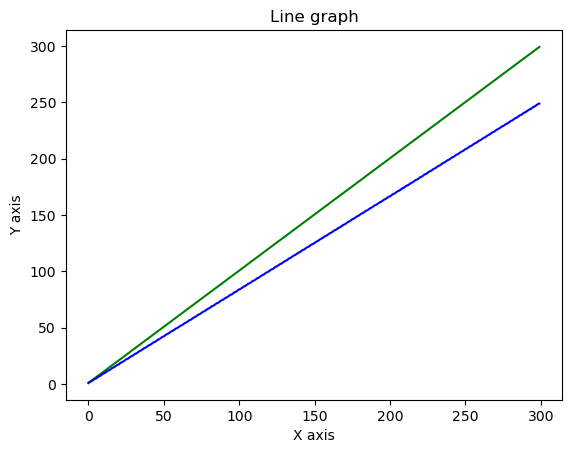

In [19]:
from utils import get_matched_fidelity
import numpy as np 
import matplotlib.pyplot as plt 

## Main Function cntd -- 4) Computing Fidelity on:
#   - circOp1
#   - circOp2 
#   - noiseCircOutput 

sumC = 0.0
sumN = 0.0
fidCC = []
fidCN = []

for i in range(0, runs):
    for b in ("X","Y","Z"):
        sumC += get_matched_fidelity(circOp1[i], circOp2[i], b)
        fidCC.append(sumC)
        sumN += get_matched_fidelity(circOp1[i], noiseCircOutput[i], b)
        fidCN.append(sumN)

# plotting fidelities vs number of runs
x = np.arange(0, runs*3) 

# plotting
plt.title("Line graph") 
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(x, fidCC, color ="green") 
plt.plot(x, fidCN, color ="blue") 
plt.show()